In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from random import random
from tqdm import tqdm

Experimentación. Realizar experimentos sobre todas las instancias comparando el modelo propuesto respecto al de la solución actual de la compañía. En cada caso, medir la mejora porcentual obtenida. Sean $z_b$ y $z_g$ el valor de la función objetivo de una solución del modelo para el batching y el de FCFS, respectivamente. definimos la mejora relativa como

$$
    \%\text{gap}= \frac{z_g − z_b}{z_b}
$$

En caso de considerarlo conveniente, pueden agregar otras métricas complementarias (respecto al método o a las soluciones) para el análisis de los resultados.
Sugerencia: se recomienda sistematizar la realización de experimentos, idealmente definiendo
la lista de instancias a considerar y reportando en algún formato conveniente (por ejemplo, csv)
el resumen de los resultados obtenidos, para ser analizados posteriormente.

In [2]:
solutions = pd.read_csv('../output/results.csv')
solutions

,filename,n,greedy_cost,min_cost_flow_cost,greedy_time,min_cost_flow_time
0,input/small_0.csv,10,36.9,29.3,0.002584,0
1,input/small_1.csv,10,42.4,32.4,0.002125,0
2,input/small_2.csv,10,65.6,56.9,0.002208,0
3,input/small_3.csv,10,29.5,23.7,0.002208,0
4,input/small_4.csv,10,33.9,30.8,0.002334,0
5,input/small_5.csv,10,63.6,54.4,0.002209,0
6,input/small_6.csv,10,44.9,41.0,0.001958,0
7,input/small_7.csv,10,56.3,46.9,0.002125,0
8,input/small_8.csv,10,38.1,35.5,0.002666,0
9,input/small_9.csv,10,58.1,49.7,0.002458,0


In [79]:
!pip3 install tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)


In [80]:
# ignore the reg_log column
solutions.drop(columns=['reg_log']).describe()

# output as latex table
print(solutions.drop(columns=['reg_log']).describe().to_markdown())

|       |       n |   greedy_cost |   min_cost_flow_cost |   greedy_time |   min_cost_flow_time |        gap |
|:------|--------:|--------------:|---------------------:|--------------:|---------------------:|-----------:|
| count |  40     |        40     |               40     |     40        |              40      | 40         |
| mean  | 215     |       696.783 |              587.278 |      0.442864 |              23.525  |  0.191644  |
| std   | 187.903 |       583.801 |              498.485 |      0.538287 |              30.6385 |  0.0590779 |
| min   |  10     |        29.5   |               23.7   |      0.001958 |               0      |  0.0732394 |
| 25%   |  77.5   |       219.875 |              184.925 |      0.046667 |               1.5    |  0.154794  |
| 50%   | 175     |       572.8   |              471.85  |      0.207666 |               8.5    |  0.178846  |
| 75%   | 312.5   |      1088.7   |              912.875 |      0.607448 |              34      |  0.241455  |
|

In [82]:
print(solutions.drop(columns=['reg_log', 'gap']).describe().to_markdown())

|       |       n |   greedy_cost |   min_cost_flow_cost |   greedy_time |   min_cost_flow_time |
|:------|--------:|--------------:|---------------------:|--------------:|---------------------:|
| count |  40     |        40     |               40     |     40        |              40      |
| mean  | 215     |       696.783 |              587.278 |      0.442864 |              23.525  |
| std   | 187.903 |       583.801 |              498.485 |      0.538287 |              30.6385 |
| min   |  10     |        29.5   |               23.7   |      0.001958 |               0      |
| 25%   |  77.5   |       219.875 |              184.925 |      0.046667 |               1.5    |
| 50%   | 175     |       572.8   |              471.85  |      0.207666 |               8.5    |
| 75%   | 312.5   |      1088.7   |              912.875 |      0.607448 |              34      |
| max   | 500     |      1737.4   |             1521.8   |      1.43354  |              82      |


In [91]:
gaps = solutions[['n', 'gap', "greedy_cost", "min_cost_flow_cost"]]
print(gaps.groupby('n')[["greedy_cost", "min_cost_flow_cost", 'gap']].mean().to_markdown())

|   n |   greedy_cost |   min_cost_flow_cost |      gap |
|----:|--------------:|---------------------:|---------:|
|  10 |         46.93 |                40.06 | 0.177322 |
| 100 |        337.31 |               280.63 | 0.205883 |
| 250 |        849.6  |               701.6  | 0.212157 |
| 500 |       1553.29 |              1326.82 | 0.171215 |


In [96]:
print(gaps.groupby('n')['gap'].describe().to_markdown())

|   n |   count |     mean |       std |       min |      25% |      50% |      75% |      max |
|----:|--------:|---------:|----------:|----------:|---------:|---------:|---------:|---------:|
|  10 |      10 | 0.177322 | 0.0769256 | 0.0732394 | 0.113712 | 0.169066 | 0.233651 | 0.308642 |
| 100 |      10 | 0.205883 | 0.0574211 | 0.104009  | 0.171945 | 0.194773 | 0.249033 | 0.287764 |
| 250 |      10 | 0.212157 | 0.0599257 | 0.144362  | 0.157622 | 0.201565 | 0.267717 | 0.299222 |
| 500 |      10 | 0.171215 | 0.0305612 | 0.135713  | 0.143316 | 0.170003 | 0.198171 | 0.216486 |


In [3]:
solutions["gap"] = (solutions["greedy_cost"] - solutions["min_cost_flow_cost"]) / solutions["min_cost_flow_cost"]

In [4]:
solutions

,filename,n,greedy_cost,min_cost_flow_cost,greedy_time,min_cost_flow_time,gap
0,input/small_0.csv,10,36.9,29.3,0.002584,0,0.259386
1,input/small_1.csv,10,42.4,32.4,0.002125,0,0.308642
2,input/small_2.csv,10,65.6,56.9,0.002208,0,0.152900
3,input/small_3.csv,10,29.5,23.7,0.002208,0,0.244726
4,input/small_4.csv,10,33.9,30.8,0.002334,0,0.100649
5,input/small_5.csv,10,63.6,54.4,0.002209,0,0.169118
6,input/small_6.csv,10,44.9,41.0,0.001958,0,0.095122
7,input/small_7.csv,10,56.3,46.9,0.002125,0,0.200426
8,input/small_8.csv,10,38.1,35.5,0.002666,0,0.073239
9,input/small_9.csv,10,58.1,49.7,0.002458,0,0.169014


In [5]:
avg_gap = solutions["gap"].mean()
avg_gap

0.19164428484224535

In [7]:
!mkdir ../output/figures

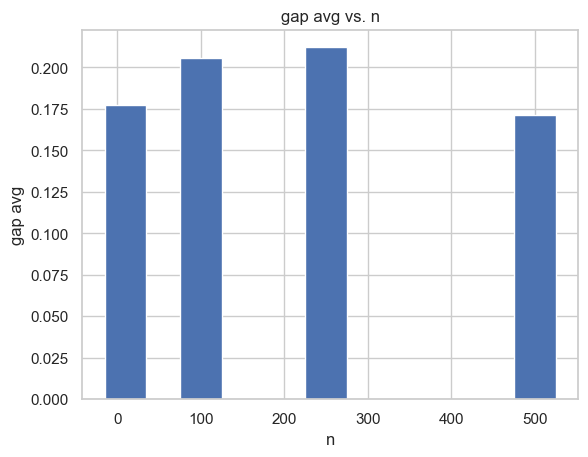

In [92]:
# Plot gap avg vs. n

avg_10  = solutions[solutions["n"] == 10]["gap"].mean()
avg_100 = solutions[solutions["n"] == 100]["gap"].mean()
avg_250 = solutions[solutions["n"] == 250]["gap"].mean()
avg_500 = solutions[solutions["n"] == 500]["gap"].mean()

# Plot gap avg vs. n
# Bar plot

ns = [10, 100, 250, 500]
avg_gaps = [avg_10, avg_100, avg_250, avg_500]

plt.bar(ns, avg_gaps, width=50)
plt.xlabel("n")
plt.ylabel("gap avg")
plt.title("gap avg vs. n")


plt.savefig("../output/figures/greedy_vs_batching.png")

plt.show()

/Users/nacho/opt/anaconda3/envs/coding/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


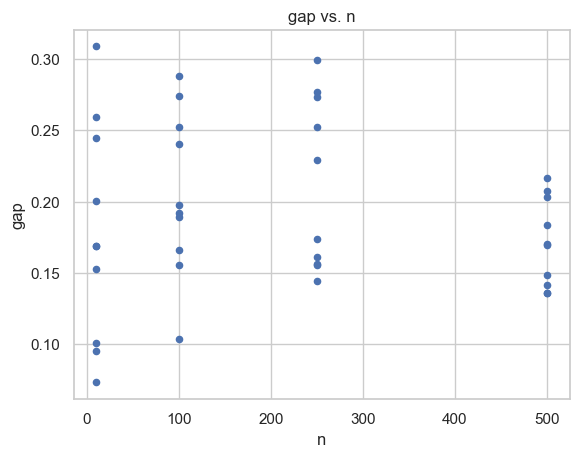

In [93]:
solutions.plot.scatter(x="n", y="gap", title="gap vs. n")

plt.savefig("../output/figures/greedy_vs_batching_scatter.png")

<Axes: xlabel='n'>

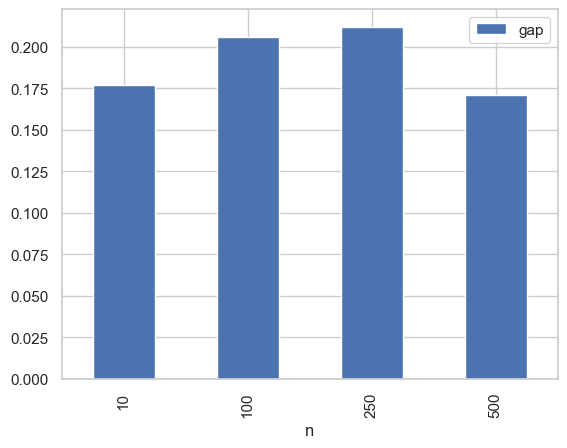

In [152]:
solutions.groupby("n")[["gap"]].mean().plot.bar()

## Idea: Generar instancias de prueba

Para cada $ n \in [2, 500] $, generar 10 instancias de prueba.

Ejemplo de instancia small_0:

10

-73.95787684429749,40.80107832750914
-73.99859389615287,40.72681272648666
-73.97613791642482,40.734920152887305
-73.95696156483291,40.76563597097822
-73.95290293686591,40.777139494435374
-74.01242622944504,40.70335908207175
-73.98976945027903,40.74715127450688
-73.99151240293912,40.75101731701905
-73.9885286873513,40.76478427621614
-73.98161858061569,40.720222744955386
-74.00070510387474,40.73729460206807,1.0621644000000001,6.96
-73.97178352556233,40.760357828133294,4.1199104,16.0
-73.97953722550209,40.78052689849282,3.8624159999999996,13.3
-73.97738435035566,40.76507454063362,1.4162192,9.3
-73.97371788498211,40.78526104848797,3.379614,12.95
-73.94433486173024,40.77458478321152,1.9312079999999998,11.15
-73.98402752048139,40.755321924476995,3.781949,15.38
-73.97725567941671,40.761841698580156,3.2991469999999996,19.9
-73.96741890580599,40.749132879508416,1.2874720000000002,6.3
-73.9535389820928,40.7750968958531,1.1265379999999998,6.96
10.6,5.3,4.3,5.5,3.2,3.9,7.1,5.8,5.8,2.9
1.2,6.1,7.1,5.9,8.1,10.4,4.2,5.6,5.5,9.5
2.9,2.8,4.6,2.9,4.9,7.2,2.8,2.6,2.3,6.2
7.5,2.1,3.9,2.3,3.7,2.2,4.0,2.6,2.7,1.3
9.0,3.6,3.3,3.8,3.1,1.2,5.5,4.1,4.2,0.3
4.4,9.8,10.8,9.6,11.8,14.1,7.9,9.3,9.2,13.2
2.1,3.2,4.2,3.0,5.3,7.6,1.4,2.7,2.7,6.6
2.3,3.1,4.0,2.9,5.1,7.4,1.2,2.6,2.9,6.4
3.9,2.3,2.4,1.3,3.5,5.8,1.4,1.5,3.8,4.8
3.7,4.8,5.8,4.6,6.9,9.2,3.5,4.3,4.2,8.2

Una instancia de prueba es un csv de la forma:

En la primera línea, el número de taxis/pasajeros $n$.
Entre la fila 2 y $n+1$, las coordenadas de los taxis.
Entre la fila $n+2$ y $2n+1$, las coordenadas de los pasajeros, la distancia de su viaje, el costo del viaje.
Entre la fila $2n+2$ y $3n+1$, la matriz de distancias entre taxis y pasajeros.

Generar una instancia de prueba es generar un csv de la forma anterior.

Ejemplo para $n=10$:

In [228]:
"""
Para cada $ n \in [2, 500] $, generar 10 instancias de prueba.

Ejemplo de instancia small_0:

Una instancia de prueba es un csv de la forma:

En la primera línea, el número de taxis/pasajeros $n$.
Entre la fila 2 y $n+1$, las coordenadas de los taxis.
Entre la fila $n+2$ y $2n+1$, las coordenadas de los pasajeros, la distancia de su viaje, el costo del viaje.
Entre la fila $2n+2$ y $3n+1$, la matriz de distancias entre taxis y pasajeros.
"""

# Ejemplo para n = 10

n = 5000

# taxis
taxis : List[Tuple[int]]= [(random() * 100, random() * 100) for _ in range(n)]

# pasajeros
pasajeros : List[Tuple[int]] = [(random() * 100, random() * 100, random() * 100, random() * 100) for _ in range(n)]

# matriz de distancias
# Formula para calcular la distancia entre dos puntos (x1, y1) y (x2, y2):
# sqrt((x1 - x2)^2 + (y1 - y2)^2)

distancias : List[List[float]] = []

for i in range(n):
    distancias.append([])
    for j in range(n):
        distancias[i].append(((taxis[i][0] - pasajeros[j][0]) ** 2 + (taxis[i][1] - pasajeros[j][1]) ** 2) ** 0.5)

# display(n)
# display(taxis)
# display(pasajeros)
# display(distancias)

# Guardar en ../input/fake_instances/small_test.csv

with open('../input/fake_instances/small_test_5000.csv', 'w') as f:
    f.write(str(n) + '\n')
    for i in range(n):
        f.write(str(taxis[i][0]) + ',' + str(taxis[i][1]) + '\n')
    for i in range(n):
        f.write(str(pasajeros[i][0]) + ',' + str(pasajeros[i][1]) + ',' + str(pasajeros[i][2]) + ',' + str(pasajeros[i][3]) + '\n')
    for i in range(n):
        for j in range(n):
            f.write(str(distancias[i][j]) + ',')
        f.write('\n')


In [238]:
def generate_instance(n: int):
    # taxis
    taxis : List[Tuple[int]]= [(random() * 100, random() * 100) for _ in range(n)]

    # pasajeros
    pasajeros : List[Tuple[int]] = [(random() * 100, random() * 100, random() * 100, random() * 100) for _ in range(n)]

    # matriz de distancias
    # Formula para calcular la distancia entre dos puntos (x1, y1) y (x2, y2):
    # sqrt((x1 - x2)^2 + (y1 - y2)^2)

    distancias : List[List[float]] = []

    for i in range(n):
        distancias.append([])
        for j in range(n):
            distancias[i].append(((taxis[i][0] - pasajeros[j][0]) ** 2 + (taxis[i][1] - pasajeros[j][1]) ** 2) ** 0.5)
    
    return taxis, pasajeros, distancias

def write_csv(n, taxis, pasajeros, distancias,  k=None):

    with open('../input/fake_instances/batched/' + str(n) + '/xxl_fake_' + str(k) + '.csv', 'w') as f:
        f.write(str(n) + '\n')
        for i in range(n):
            f.write(str(taxis[i][0]) + ',' + str(taxis[i][1]) + '\n')
        for i in range(n):
            f.write(str(pasajeros[i][0]) + ',' + str(pasajeros[i][1]) + ',' + str(pasajeros[i][2]) + ',' + str(pasajeros[i][3]) + '\n')
        for i in range(n):
            for j in range(n):
                f.write(str(distancias[i][j]) + ',')
            f.write('\n')

In [ ]:
# Generar 10 instancias de prueba para cada n en [2, 500]
for n in tqdm(range(2, 501)):
    for i in range(1):
        taxis, pasajeros, distancias = generate_instance(n)
        write_csv(n, taxis, pasajeros, distancias)

In [21]:
!mkdir ../input/fake_instances

In [24]:
!rm -rf ../input/fake_instances && mkdir ../input/fake_instances

In [15]:
!pip3 install multiprocess

     |████████████████████████████████| 132 kB 10.0 MB/s eta 0:00:01


In [230]:
from multiprocess import Pool

In [ ]:
# Paralelizar el código anterior

with Pool(8) as p:
    instances = p.map(generate_instance, range(502, 2000))
    for j in range(10):
        for n, (taxis, pasajeros, distancias) in enumerate(tqdm(instances)):
            write_csv(n, taxis, pasajeros, distancias, j)


In [237]:
import os

In [243]:
def gen_save(n):
    taxis, pasajeros, distancias = generate_instance(n)
    # create ../input/fake_instances/n folder if it doesn't exist
    k = len(os.listdir("../input/fake_instances/batched/" + str(n))) + 1
    write_csv(n, taxis, pasajeros, distancias, k)

In [244]:
for n in tqdm(range(2, 2000)):
    if not os.path.exists("../input/fake_instances/batched/" + str(n)):
        os.makedirs("../input/fake_instances/batched/" + str(n))

100%|██████████| 1998/1998 [00:00<00:00, 21026.45it/s]


In [ ]:
with Pool(10) as p:
    p.map(gen_save, tqdm(range(2, 2000)))
    

In [9]:
ad_hoc_solutions = pd.read_csv("../output/fake/results.csv")
ad_hoc_solutions.head()

,filename,n,greedy_cost,min_cost_flow_cost,greedy_time,min_cost_flow_time
0,input/fake_instances/fake_403_6.csv,403,2587.86,1922.110,0.634375,40
1,input/fake_instances/fake_78_1.csv,78,1265.03,943.192,0.037459,1
2,input/fake_instances/fake_446_6.csv,446,3304.80,2196.170,0.790167,53
3,input/fake_instances/fake_460_5.csv,460,3487.10,2259.200,0.785125,49
4,input/fake_instances/fake_398_9.csv,398,3613.14,2578.070,0.689750,41


In [10]:
ad_hoc_solutions = ad_hoc_solutions[ad_hoc_solutions["n"] > 2]

In [11]:
#solutions["gap"] = (solutions["greedy_cost"] - solutions["min_cost_flow_cost"]) / solutions["min_cost_flow_cost"]
ad_hoc_solutions["gap"] = (ad_hoc_solutions["greedy_cost"] - ad_hoc_solutions["min_cost_flow_cost"]) / ad_hoc_solutions["min_cost_flow_cost"]
ad_hoc_solutions.head()


,filename,n,greedy_cost,min_cost_flow_cost,greedy_time,min_cost_flow_time,gap
0,input/fake_instances/fake_403_6.csv,403,2587.86,1922.110,0.634375,40,0.346364
1,input/fake_instances/fake_78_1.csv,78,1265.03,943.192,0.037459,1,0.341222
2,input/fake_instances/fake_446_6.csv,446,3304.80,2196.170,0.790167,53,0.504802
3,input/fake_instances/fake_460_5.csv,460,3487.10,2259.200,0.785125,49,0.543511
4,input/fake_instances/fake_398_9.csv,398,3613.14,2578.070,0.689750,41,0.401490


In [12]:
ad_hoc_solutions["gap"].describe()

count    4960.000000
mean        0.417210
std         0.097456
min         0.058418
25%         0.366200
50%         0.427162
75%         0.483098
max         0.772146
Name: gap, dtype: float64

In [133]:
print(ad_hoc_solutions.groupby("n")["gap"].describe().to_markdown())

|   n |   count |      mean |         std |       min |       25% |       50% |       75% |       max |
|----:|--------:|----------:|------------:|----------:|----------:|----------:|----------:|----------:|
|   3 |      10 | 0.335435  | 0           | 0.335435  | 0.335435  | 0.335435  | 0.335435  | 0.335435  |
|   4 |      10 | 0.772146  | 0           | 0.772146  | 0.772146  | 0.772146  | 0.772146  | 0.772146  |
|   5 |      10 | 0.0882419 | 0           | 0.0882419 | 0.0882419 | 0.0882419 | 0.0882419 | 0.0882419 |
|   6 |      10 | 0.157427  | 2.92569e-17 | 0.157427  | 0.157427  | 0.157427  | 0.157427  | 0.157427  |
|   7 |      10 | 0.202027  | 2.92569e-17 | 0.202027  | 0.202027  | 0.202027  | 0.202027  | 0.202027  |
|   8 |      10 | 0.172123  | 2.92569e-17 | 0.172123  | 0.172123  | 0.172123  | 0.172123  | 0.172123  |
|   9 |      10 | 0.238708  | 0           | 0.238708  | 0.238708  | 0.238708  | 0.238708  | 0.238708  |
|  10 |      10 | 0.2884    | 5.85139e-17 | 0.2884    | 0.2884  

In [150]:
# ad_hoc_solutions.groupby("n")["gap"].describe()
# Get values every 50

mean_res = ad_hoc_solutions[(ad_hoc_solutions["n"] % 50 == 0) | (ad_hoc_solutions["n"] == 498) | (ad_hoc_solutions["n"] == 3)].groupby("n")["gap"].describe()

print(mean_res.drop(columns=["count", "min", "max", "25%", "50%", "75%", "std"]).to_markdown())

|   n |     mean |
|----:|---------:|
|   3 | 0.335435 |
|  50 | 0.470381 |
| 100 | 0.262508 |
| 150 | 0.38071  |
| 200 | 0.488713 |
| 250 | 0.477224 |
| 300 | 0.469546 |
| 350 | 0.500416 |
| 400 | 0.399574 |
| 450 | 0.449788 |
| 498 | 0.476677 |


In [128]:
!pip3 install seaborn

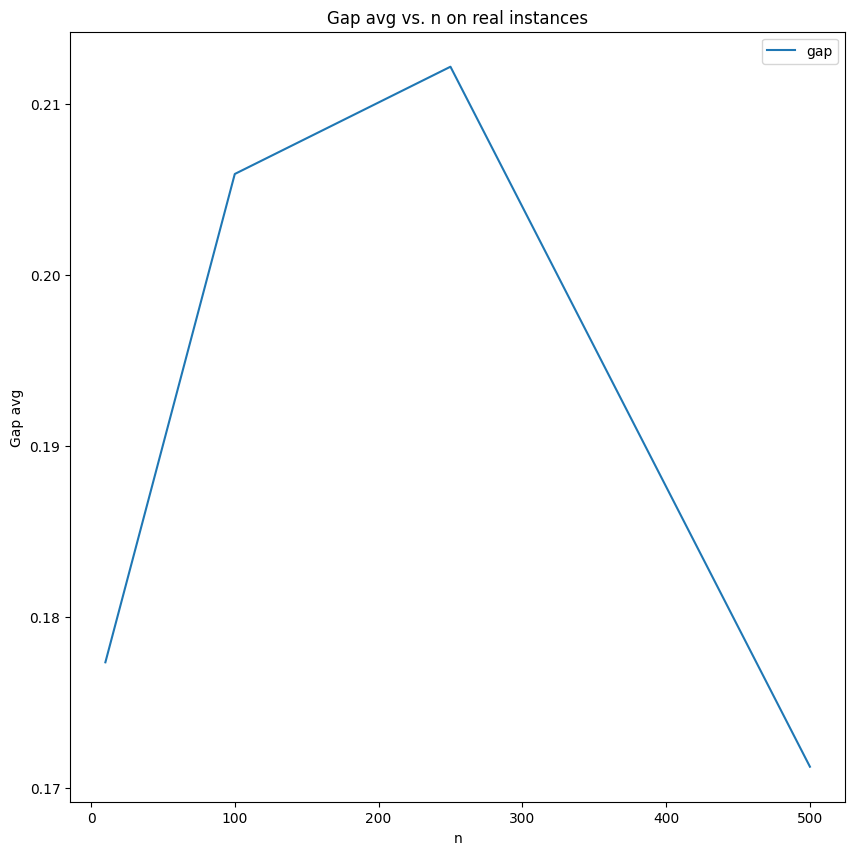

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
solutions.groupby("n")[["gap"]].mean().plot(ax=ax)

ax.set_title("Gap avg vs. n on real instances")

ax.set_xlabel("n")
ax.set_ylabel("Gap avg")

plt.savefig("../output/figures/gap_avg_vs_n_real.png")

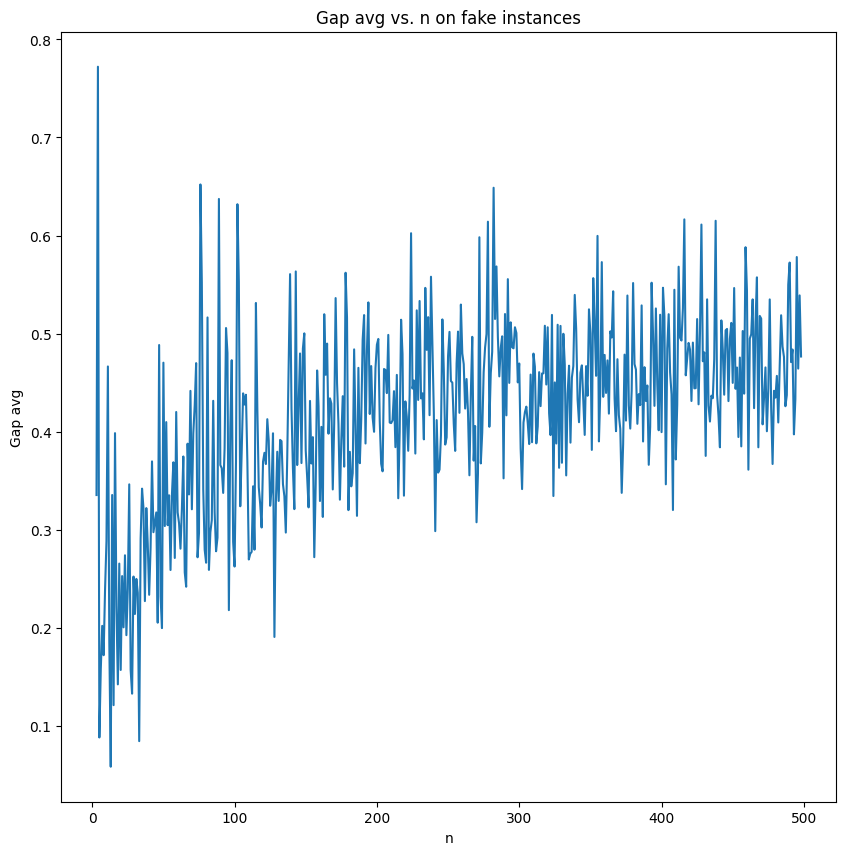

In [17]:
# Plot gap avg vs. n
fig, ax = plt.subplots(figsize=(10, 10))

ad_hoc_solutions.groupby("n")["gap"].mean().plot(ax=ax)

ax.set_title("Gap avg vs. n on fake instances")
ax.set_xlabel("n")
ax.set_ylabel("Gap avg")

plt.savefig("../output/figures/gap_avg_vs_n_fake.png")

/Users/nacho/opt/anaconda3/envs/coding/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


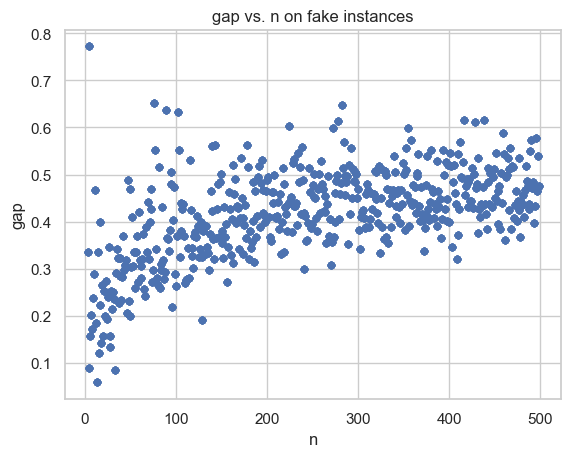

In [101]:
ad_hoc_solutions.plot.scatter(x="n", y="gap", title="gap vs. n on fake instances")

plt.savefig("../output/figures/gap_vs_n_fake_scatter.png")

In [16]:
import seaborn as sns

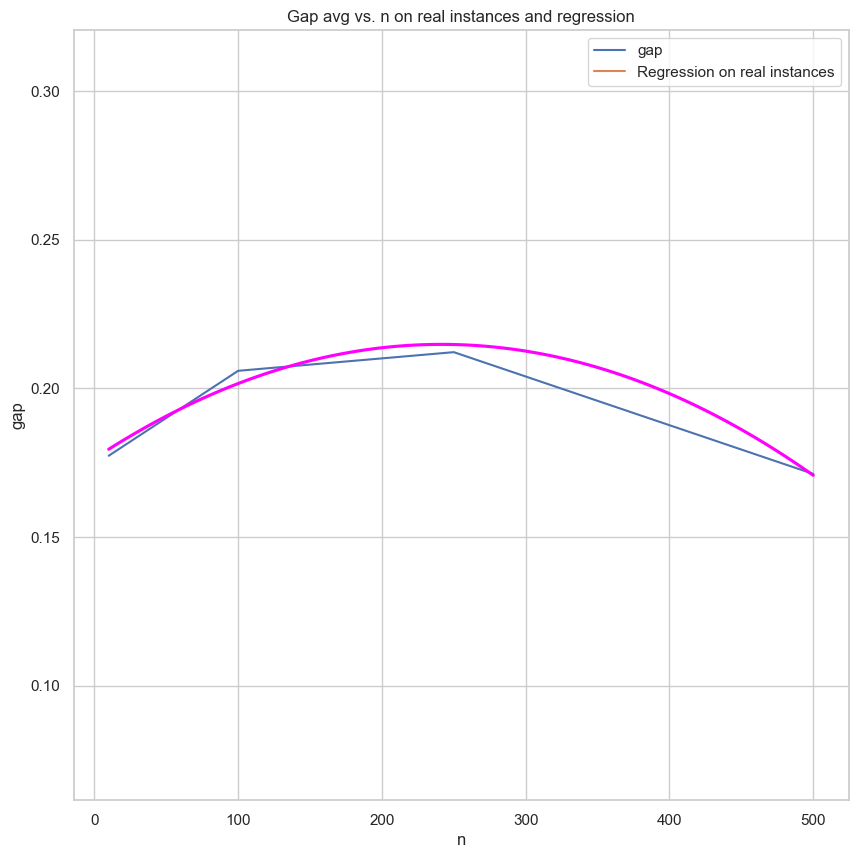

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))

solutions.groupby("n")[["gap"]].mean().plot(ax=ax, label="Mean gap")
reg_line = sns.regplot(
                x="n",
                y="gap",
                data=solutions,
                order=2,
                ci=None,
                color="fuchsia",
                marker="",
                ax=ax,
                #label="Regression on real instances",
            )

ax.plot(
    [], [],
    label="Regression on real instances"
)

_ = ax.legend()

ax.set_title("Gap avg vs. n on real instances and regression")

plt.savefig("../output/figures/gap_avg_vs_n_real_reg.png")

[]

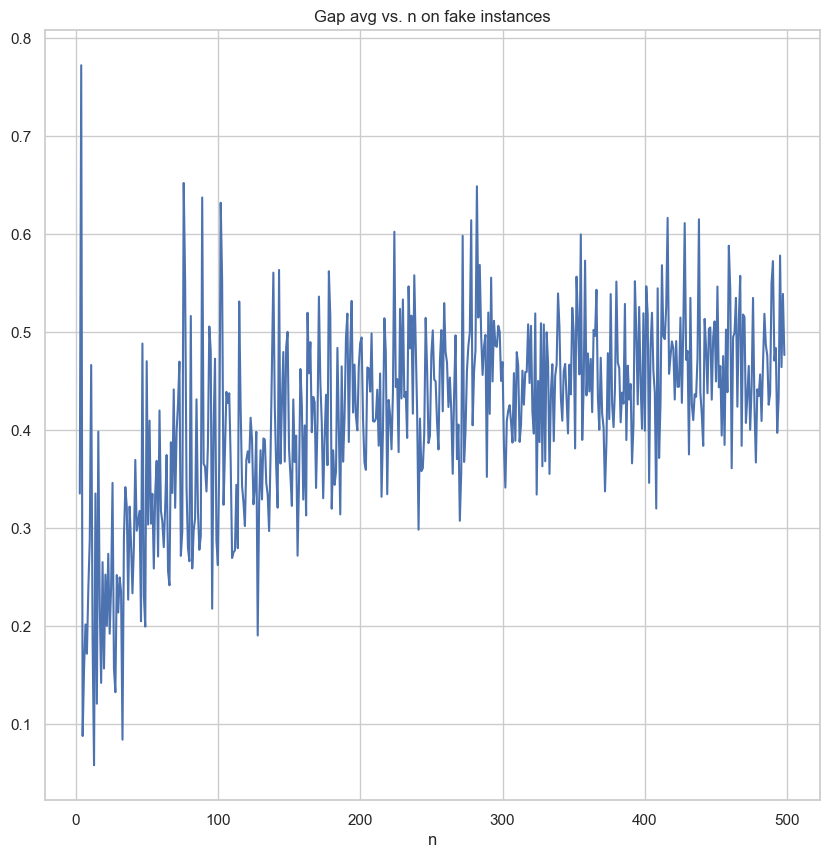

In [222]:
# Add a regression line

fig, ax = plt.subplots(figsize=(10, 10))

#reset axes
ax = ad_hoc_solutions.groupby("n")["gap"].mean().plot()
_ = sns.set_theme(style="whitegrid")

ax.set_title("Gap avg vs. n on fake instances")
ax.set_xlabel("n")

ax.plot()


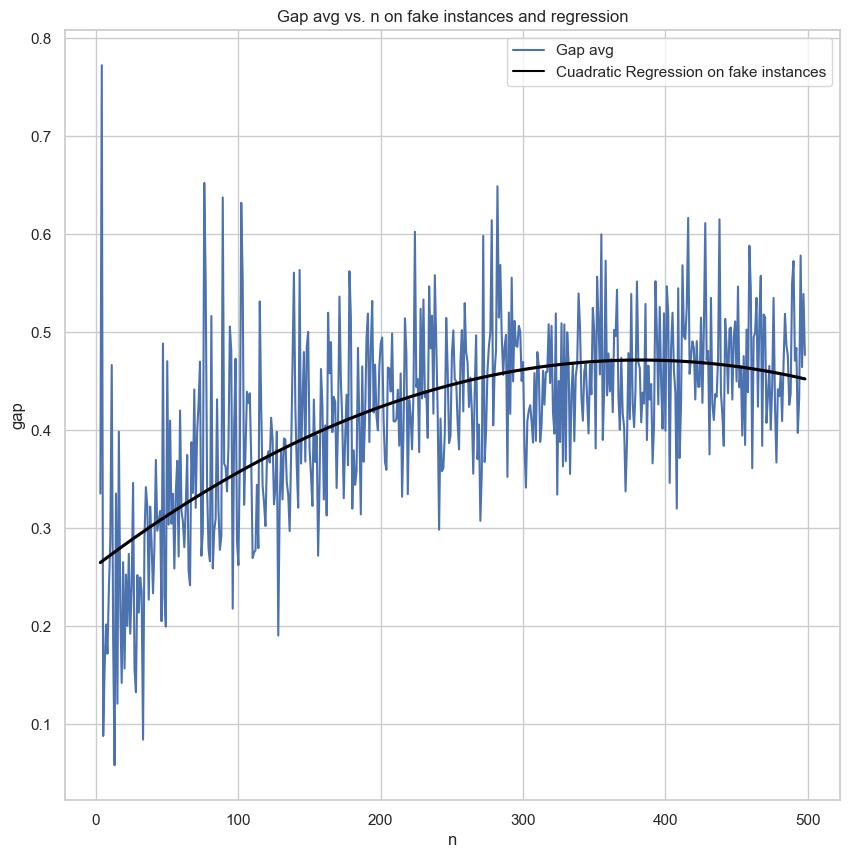

In [73]:
# add ns and avg_gaps to the plot
fig, ax = plt.subplots(figsize=(10, 10))

ad_hoc_solutions.groupby("n")["gap"].mean().plot(
    label= "Gap avg",
)

sns.set_theme(style="whitegrid")

ax = sns.regplot(
                x="n",
                y="gap",
                data=ad_hoc_solutions,
                order=2,
                ci=None,
                color="black",
                marker="",
            )

ax.plot(
    [], [],
    color="black",
    marker="",
    label="Cuadratic Regression on fake instances",
)

ax.set_title("Gap avg vs. n on fake instances and regression")
ax.set_xlabel("n")

#ax.legend(["Gap avg", "Cuadratic Regression"])
_ = ax.legend()

ax.plot()

plt.savefig("../output/figures/gap_avg_vs_n_fake_reg.png")
        

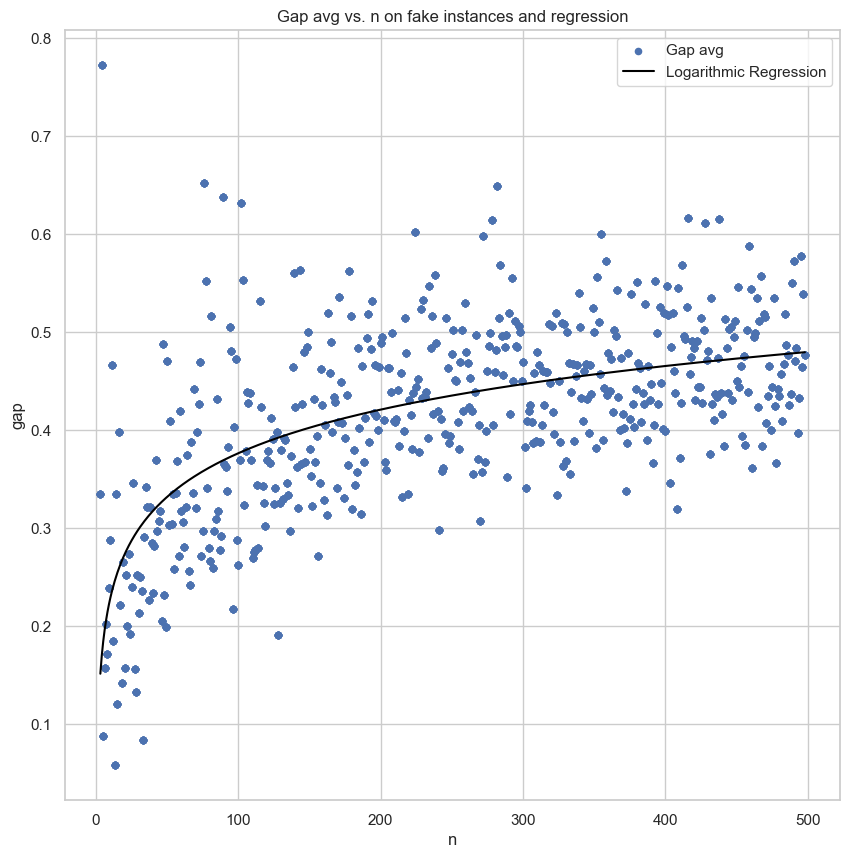

In [102]:
# add ns and avg_gaps to the plot
fig, ax = plt.subplots(figsize=(10, 10))

ad_hoc_solutions.plot.scatter(x="n", y="gap", title="gap vs. n", ax=ax)

sns.set_theme(style="whitegrid")

# Logarithmic regression

log_reg = np.polyfit(
                np.log(ad_hoc_solutions["n"]), 
                ad_hoc_solutions["gap"],
                1
        )
ad_hoc_solutions["reg_log"] = log_reg[0] * np.log(ad_hoc_solutions["n"]) + log_reg[1]

fake_reg_vals = ad_hoc_solutions.groupby("n")["reg_log"].mean()

ax.plot(fake_reg_vals, color="black", label="Logarithmic regression")

# plot the logarithmic regression line with seaborn

ax.set_title("Gap avg vs. n on fake instances and regression")
ax.set_xlabel("n")

ax.legend(["Gap avg", "Logarithmic Regression"])

ax.plot()

plt.savefig("../output/figures/gap_avg_vs_n_fake_scatter_log_reg.png")
        

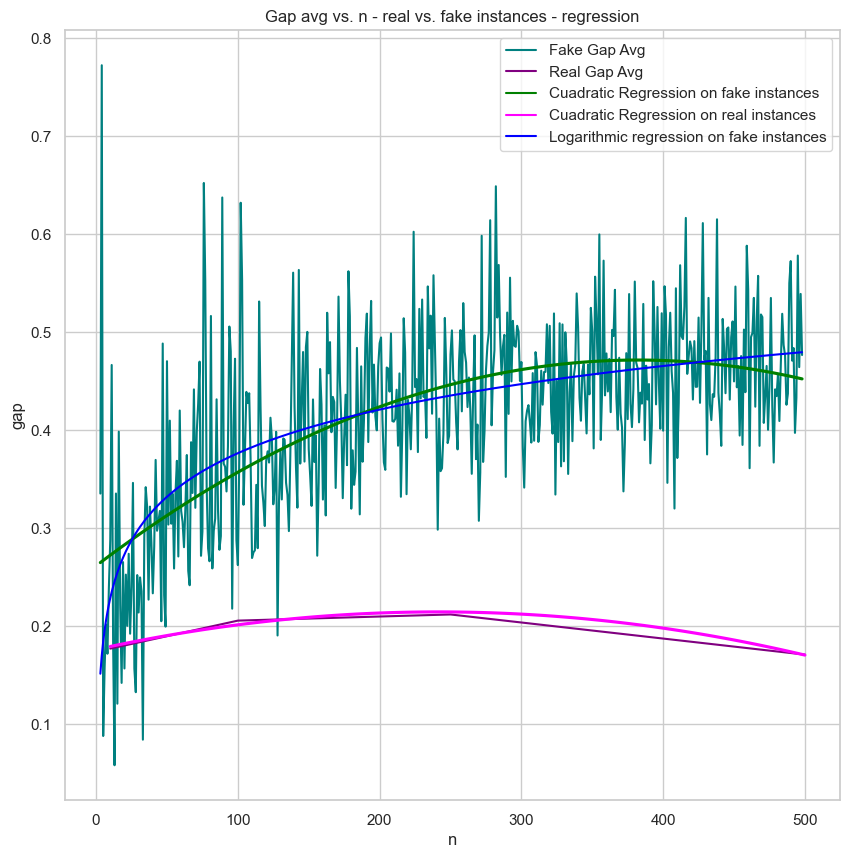

In [74]:
fig, ax = plt.subplots(figsize=(10, 10))

fake_vals = ad_hoc_solutions.groupby("n")[["gap"]].mean()
real_vals = solutions.groupby("n")[["gap"]].mean()

ax.plot(fake_vals.index, fake_vals["gap"], color="teal", label="Fake Gap Avg")
ax.plot(real_vals.index, real_vals["gap"], color="purple", label="Real Gap Avg")

# Get regression line for fake instances

reg_line = sns.regplot(
                x="n",
                y="gap",
                data=ad_hoc_solutions,
                order=2,
                ci=None,
                color="green",
                marker="",
                ax=ax,
                #label="Cuadratic Regression on fake instances",
            )

reg_line = sns.regplot(
                x="n",
                y="gap",
                data=solutions,
                order=2,
                ci=None,
                color="fuchsia",
                marker="",
                ax=ax,
                #label="Cuadratic Regression on real instances",
            )

ax.plot(
    [], [],
    color="green",
    label="Cuadratic Regression on fake instances"
)

ax.plot(
    [], [],
    color="fuchsia",
    label="Cuadratic Regression on real instances"
)

ax.plot(fake_reg_vals, color="blue", label="Logarithmic regression on fake instances")

ax.set_title("Gap avg vs. n - real vs. fake instances - regression")
ax.set_xlabel("n")

_ = ax.legend()

plt.savefig("../output/figures/gap_avg_vs_n_real_fake_reg.png")

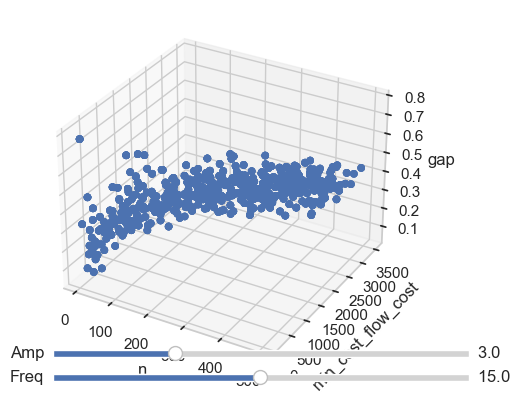

In [135]:
# 3d plot of gap avg vs. n vs. min_cost_flow_cost

import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(ad_hoc_solutions["n"], ad_hoc_solutions["min_cost_flow_cost"], ad_hoc_solutions["gap"])

ax.set_xlabel('n')

ax.set_ylabel('min_cost_flow_cost')

ax.set_zlabel('gap')

# Make the plot rotate interactively

from matplotlib.widgets import Slider, Button, RadioButtons

axcolor = 'lightgoldenrodyellow'

axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=15)

samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=3)

# Open the interactive plot in a new window outside of Jupyter

plt.show()

In [73]:
#upgrade sklearn

!pip3 install --upgrade scikit-learn

  Using cached scikit_learn-1.2.2-cp38-cp38-macosx_10_9_x86_64.whl (9.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


Text(0.5, 0, 'gap')

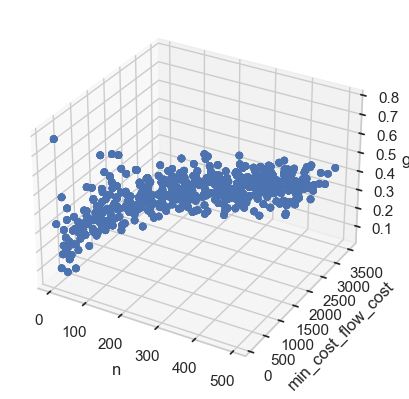

In [137]:
# Add a regression plane

import numpy as np

np.float = np.float64

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline

#reset axes

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(ad_hoc_solutions["n"], ad_hoc_solutions["min_cost_flow_cost"], ad_hoc_solutions["gap"])

ax.set_xlabel('n')

ax.set_ylabel('min_cost_flow_cost')

ax.set_zlabel('gap')

# model.fit(X, y)

# Input contains NaN, infinity or a value too large for dtype('float64').

# To fix this, we can cap the max value of X


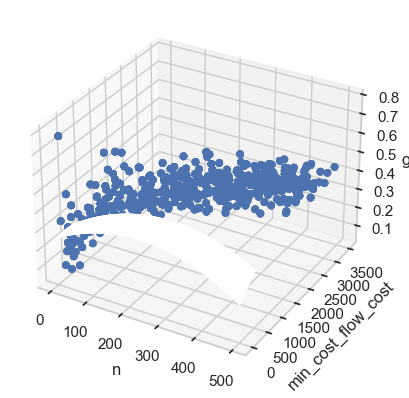

In [141]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(ad_hoc_solutions["n"], ad_hoc_solutions["min_cost_flow_cost"], ad_hoc_solutions["gap"])

ax.set_xlabel('n')

ax.set_ylabel('min_cost_flow_cost')

ax.set_zlabel('gap')

# Add a regression plane

X = ad_hoc_solutions[["n", "min_cost_flow_cost"]]
y = ad_hoc_solutions["gap"]

model = make_pipeline(PolynomialFeatures(2), LinearRegression())

model.fit(X, y)

xx, yy = np.meshgrid(np.linspace(0, 500, 100), np.linspace(0, 500, 100))

zz = np.array([xx.flatten(), yy.flatten()]).T

zz = model.predict(zz)

zz = zz.reshape(xx.shape)

ax.plot_surface(xx, yy, zz, color="blue", alpha=0.5)

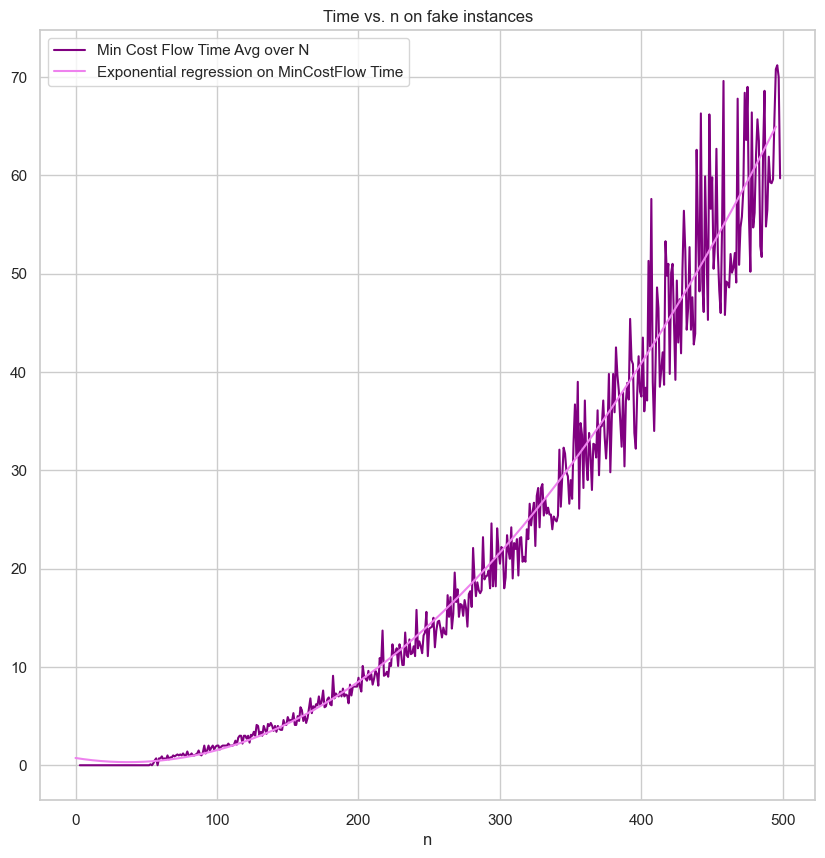

In [127]:
# Analisis de tiempo de ejecucion

ad_hoc_solutions["greedy_time"] = ad_hoc_solutions["greedy_time"].apply(lambda x: float(x))
ad_hoc_solutions["min_cost_flow_time"] = ad_hoc_solutions["min_cost_flow_time"].apply(lambda x: float(x))

# Plot time vs. n

fig, ax = plt.subplots(figsize=(10, 10))

greedy_times = ad_hoc_solutions.groupby("n")[["greedy_time"]].mean()
min_cost_flow_times = ad_hoc_solutions.groupby("n")[["min_cost_flow_time"]].mean()

""" 
ax.plot(greedy_times,
        color="teal",
        label="Greedy Time Avg over N")
 """

ax.plot(min_cost_flow_times,
        color="purple",
        label="Min Cost Flow Time Avg over N")


# Exponential regression of min_cost_flow_time

exp_reg = np.poly1d(np.polyfit(min_cost_flow_times.index, min_cost_flow_times["min_cost_flow_time"], 2))

exp_reg_vals = exp_reg(min_cost_flow_times.index)

ax.plot(exp_reg_vals, 
        color="Violet", 
        label="Exponential regression on MinCostFlow Time")

ax.set_title("Time vs. n on fake instances")
ax.set_xlabel("n")

_ = ax.legend()

plt.savefig("../output/figures/time_vs_n_mincostflow_fake_scatter.png")

# Plot time vs. n


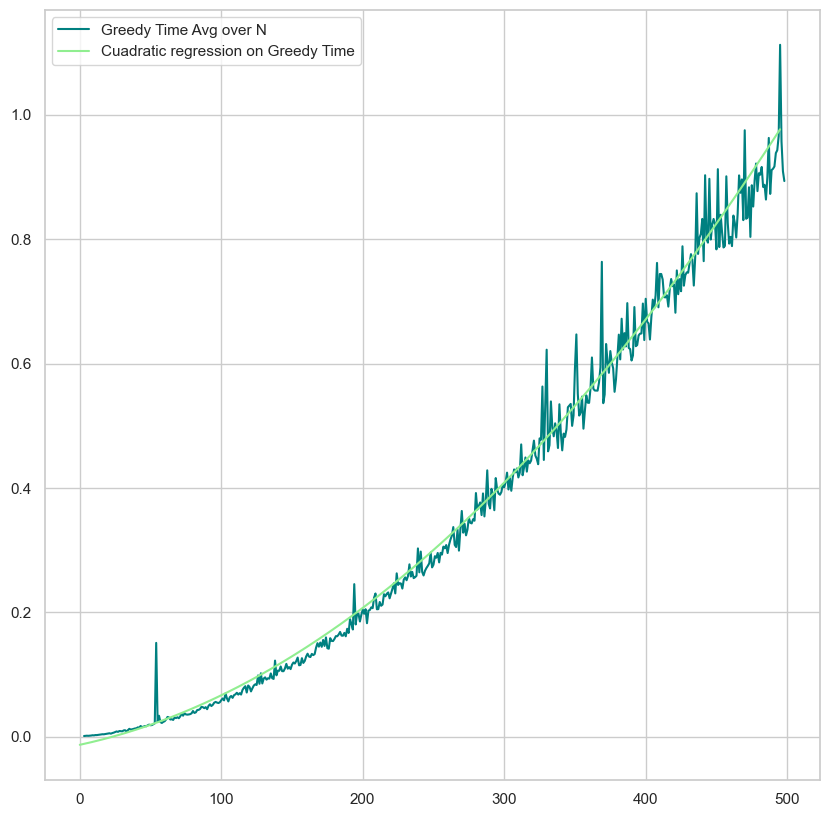

In [128]:
fig, ax = plt.subplots(figsize=(10, 10))

_ = ax.plot(greedy_times,
        color="teal",
        label="Greedy Time Avg over N")

# Cuadratic regression of greedy_time

reg = np.poly1d(np.polyfit(greedy_times.index, greedy_times["greedy_time"], 2))

reg_vals = reg(greedy_times.index)

ax.plot(reg_vals,
        color="lightgreen",
        label="Cuadratic regression on Greedy Time")

_ = ax.legend(loc="upper left")

plt.savefig("../output/figures/time_vs_n_greedy_fake_scatter.png")

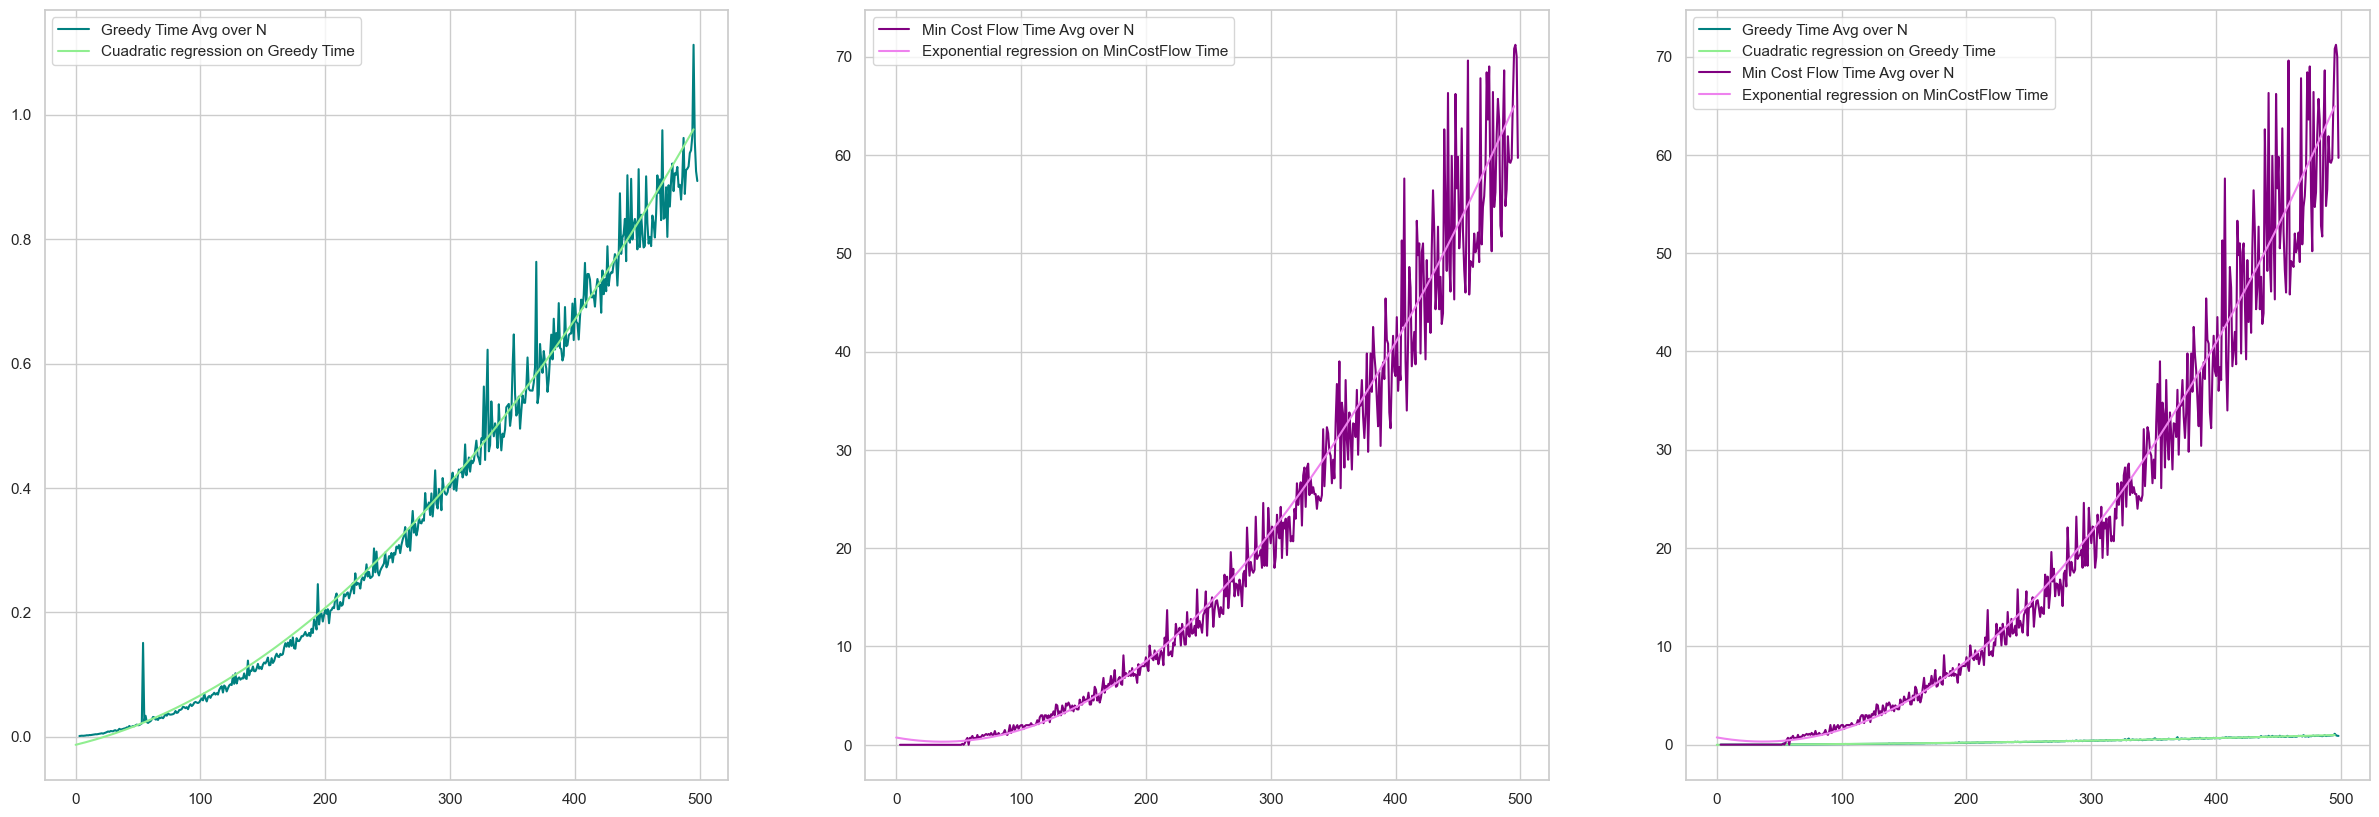

In [132]:
fit, axs = plt.subplots(1, 3, figsize=(30, 10))

axs[0].plot(greedy_times,
        color="teal",
        label="Greedy Time Avg over N")

axs[0].plot(reg_vals,
        color="lightgreen",
        label="Cuadratic regression on Greedy Time")

axs[0].legend(loc="upper left")

axs[1].plot(min_cost_flow_times,
        color="purple",
        label="Min Cost Flow Time Avg over N")

axs[1].plot(exp_reg_vals,
        color="Violet",
        label="Exponential regression on MinCostFlow Time")

axs[1].legend()

axs[2].plot(greedy_times,
        color="teal",
        label="Greedy Time Avg over N")

axs[2].plot(reg_vals,
        color="lightgreen",
        label="Cuadratic regression on Greedy Time")

axs[2].plot(min_cost_flow_times,
        color="purple",
        label="Min Cost Flow Time Avg over N")

axs[2].plot(exp_reg_vals,
        color="Violet",
        label="Exponential regression on MinCostFlow Time")

axs[2].legend()

plt.savefig("../output/figures/greedy_vs_batching_time.png")